In [43]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [72]:
def get_data(glob_pattern):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=0).melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [80]:
data = get_data("??-*.*.timings.csv")

In [81]:
data

,clock,time (s),query,endpoint
0,Wall (s),1.46,count triples,fuseki
1,Wall (s),1.38,count triples,fuseki
2,Wall (s),1.36,count triples,fuseki
3,Wall (s),1.37,count triples,fuseki
4,Wall (s),1.43,count triples,fuseki
...,...,...,...,...
295,Sys(s),0.45,list of attributes,ontop
296,Sys(s),0.32,list of attributes,ontop
297,Sys(s),0.51,list of attributes,ontop
298,Sys(s),0.36,list of attributes,ontop


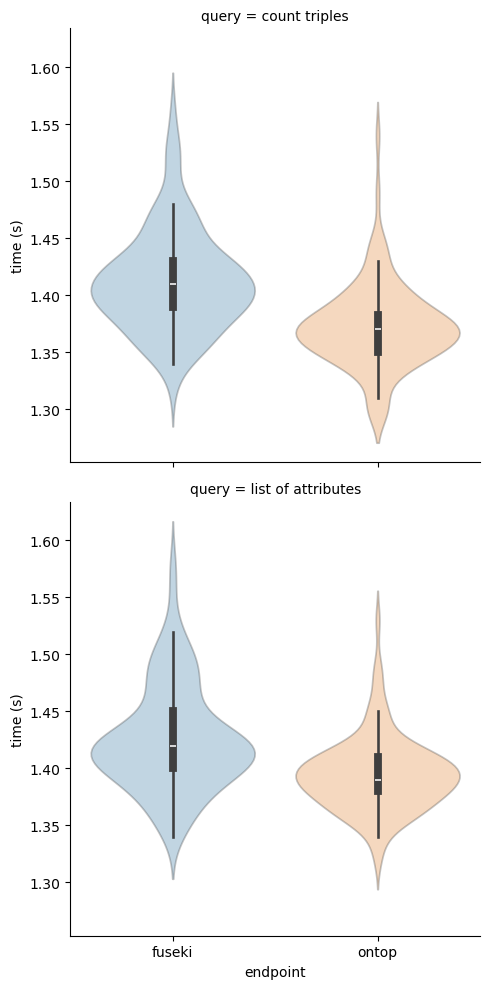

In [84]:
seaborn.catplot(kind='violin', data=data[data.clock=='Wall (s)'], x='endpoint', y='time (s)', hue='endpoint', row='query', alpha=0.3) 

In [76]:
seaborn.stripplot(data=timings_data.melt(), x='variable', y='value', hue='variable', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('time')
ax.set_title("Query "+DATASET.replace("_", " ").replace("-", ": "))

Text(0.5, 1.0, 'Query 01: list of attributes')

Text(0.5, 1.0, 'Query 01: list of attributes')

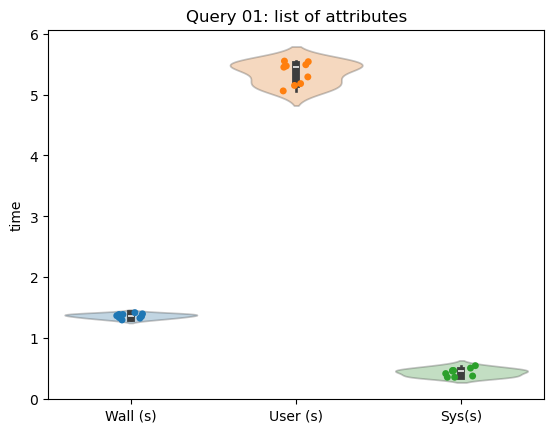

In [38]:
fig, ax = mpl.pyplot.subplots()
seaborn.violinplot(data=timings_data.melt(), x='variable', y='value', hue='variable', alpha=0.3, ax=ax)
seaborn.stripplot(data=timings_data.melt(), x='variable', y='value', hue='variable', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('time')
ax.set_title("Query "+DATASET.replace("_", " ").replace("-", ": "))

In [ ]:
Wall (s),User (s),Sys(s)
1.43,5.53,0.36
1.40,5.50,0.39
1.37,5.53,0.41
1.37,5.37,0.42
1.36,5.57,0.40
1.38,5.23,0.47
1.38,5.52,0.46
1.38,5.54,0.43
1.38,5.60,0.39
